### Game Environment

- each game, has many rounds, which has many periods, which has fixed bid-ask and buy-sell time steps. 
- token distributions are fixed within a round, but values vary accross periods
- at start of a game, the following information is revealed: 
    - Game start: (public information) num_rounds, num_periods, time_steps, num_tokens, distribution
    - Round start: (private information) token values are revealed to each trader.
    - Each seller has ntokens number of tokens, buyers have none. 
- at start of round, we can compute the demand and supply curves from the token_values and the competitive equilibrium. At this price, we would see the market instantly clear. 


In [240]:
import numpy as np
from numba import jit

def game_setup(max_rounds, max_periods, max_tokens, max_buyers, max_sellers, max_K, minprice = 1, maxprice = 2000, ntimes = 25):
    nrounds = np.random.randint(1,max_rounds)
    nperiods = np.random.randint(1,max_periods)
    nbuyers = np.random.randint(1,max_buyers)
    nsellers = np.random.randint(1,max_sellers)
    ntokens = np.random.randint(1,max_tokens)
    gametype_1 = np.random.randint(1,max_K)
    gametype_2 = np.random.randint(1,max_K)
    gametype_3 = np.random.randint(1,max_K)
    gametype_4 = np.random.randint(1,max_K)
    R1 = 3 ** gametype_1 - 1
    R2 = 3 ** gametype_2 - 1
    R3 = 3 ** gametype_3 - 1
    R4 = 3 ** gametype_4 - 1
    return nrounds, nperiods, ntokens, nbuyers, nsellers, R1, R2, R3, R4, minprice, maxprice, ntimes

@jit
def round_setup(ntokens, nbuyers, nsellers, R1, R2, R3, R4):
    A = np.random.uniform(0,R1)
    B = np.random.uniform(0,R2)
    C = np.random.uniform(0,R3,(nbuyers + nsellers,1))
    D = np.random.uniform(0,R4,(nbuyers + nsellers,ntokens))
    token_values = A + B + C + D
    return token_values

In [241]:
# Game parameters 
nrounds, nperiods, ntokens, nbuyers, nsellers, R1, R2, R3, R4, minprice, maxprice, ntimes = game_setup(7,7,7,7,7,7)
token_values = round_setup(ntokens, nbuyers, nsellers, R1, R2, R3, R4)
print(nrounds, nperiods, ntokens, nbuyers, nsellers)
print(token_values) # player (row), token ID (col)

4 6 4 6 4
[[328.89037943 392.57840495 434.12043008 333.38669811]
 [358.50806995 355.40033886 401.93419693 439.2366519 ]
 [447.81026373 391.07953604 495.94206281 464.2298451 ]
 [436.31198135 431.0425494  537.27438855 421.55102382]
 [415.5352727  436.07875932 540.24081975 473.62120977]
 [446.54913511 386.35779291 395.98606602 450.68315001]
 [385.00850218 313.98227308 364.54798464 546.10464268]
 [563.25659525 402.07345166 396.82986591 505.37098169]
 [468.87092108 514.36520062 333.12260324 537.91737516]
 [502.19471002 375.78838529 497.04618043 413.8720236 ]]


In [242]:
np.sort(token_values, axis = 1)

array([[328.89037943, 333.38669811, 392.57840495, 434.12043008],
       [355.40033886, 358.50806995, 401.93419693, 439.2366519 ],
       [391.07953604, 447.81026373, 464.2298451 , 495.94206281],
       [421.55102382, 431.0425494 , 436.31198135, 537.27438855],
       [415.5352727 , 436.07875932, 473.62120977, 540.24081975],
       [386.35779291, 395.98606602, 446.54913511, 450.68315001],
       [313.98227308, 364.54798464, 385.00850218, 546.10464268],
       [396.82986591, 402.07345166, 505.37098169, 563.25659525],
       [333.12260324, 468.87092108, 514.36520062, 537.91737516],
       [375.78838529, 413.8720236 , 497.04618043, 502.19471002]])

### Competitive Equilibrium


Eqbm price range: 344.0 to 376.0
Eqbm quantity: 5


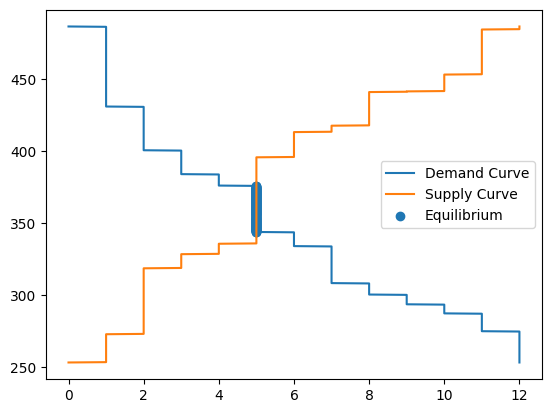

([343.68868868868867,
  343.9224224224224,
  344.15615615615616,
  344.3898898898899,
  344.62362362362364,
  344.8573573573574,
  345.0910910910911,
  345.3248248248248,
  345.55855855855856,
  345.7922922922923,
  346.02602602602605,
  346.25975975975973,
  346.4934934934935,
  346.7272272272272,
  346.96096096096096,
  347.1946946946947,
  347.42842842842845,
  347.6621621621622,
  347.89589589589593,
  348.1296296296296,
  348.36336336336336,
  348.5970970970971,
  348.83083083083085,
  349.06456456456453,
  349.2982982982983,
  349.532032032032,
  349.76576576576576,
  349.9994994994995,
  350.23323323323325,
  350.466966966967,
  350.70070070070074,
  350.9344344344344,
  351.16816816816817,
  351.4019019019019,
  351.63563563563565,
  351.86936936936934,
  352.1031031031031,
  352.3368368368368,
  352.57057057057057,
  352.8043043043043,
  353.03803803803805,
  353.2717717717718,
  353.50550550550554,
  353.7392392392392,
  353.97297297297297,
  354.2067067067067,
  354.44044044

In [260]:
@jit
def token_value_breakup(token_values,nbuyers,nsellers):
    buyer_token_values = token_values[0:nbuyers,:]
    max_eqbm_price = np.max(buyer_token_values)
    seller_token_values = token_values[nbuyers:nbuyers+nsellers,:]
    min_eqbm_price = np.min(seller_token_values)
    return buyer_token_values, seller_token_values, max_eqbm_price, min_eqbm_price

@jit
def compute_demand_curve(buyer_token_values,nbuyers,ntokens,min_eqbm_price,max_eqbm_price,granularity=1000):
    P_grid = np.linspace(min_eqbm_price,max_eqbm_price,granularity)
    demand_schedule = np.zeros((granularity),dtype = 'int')
    for i, p in enumerate(P_grid):
        demand = np.sum(p<buyer_token_values) # how many tokens are buyers ready to buy at this price
        demand_schedule[i] = demand
    return demand_schedule, P_grid

@jit
def compute_supply_curve(seller_token_values,nsellers,ntokens,min_eqbm_price,max_eqbm_price,granularity=1000):
    P_grid = np.linspace(min_eqbm_price,max_eqbm_price,granularity)
    supply_schedule = np.zeros((granularity), dtype = 'int')
    for i, p in enumerate(P_grid):
        supply = np.sum(p>seller_token_values) # how much sellers are ready to sell at this price
        supply_schedule[i] = supply
    return supply_schedule, P_grid

@jit
def find_equilibrium(demand_schedule,supply_schedule,P_grid):
    p_eqbm = []
    q_eqbm = None
    for i, p in enumerate(P_grid):
        if demand_schedule[i] == supply_schedule[i]: # when sellers are ready to sell
            p_eqbm.append(p)
            q_eqbm = demand_schedule[i]
    return p_eqbm, q_eqbm

def plot_demand_supply(token_values):
    buyer_token_values, seller_token_values, max_eqbm_price, min_eqbm_price = token_value_breakup(token_values,nbuyers,nsellers)
    demand_schedule, P_grid = compute_demand_curve(buyer_token_values,nbuyers,ntokens,min_eqbm_price,max_eqbm_price)
    supply_schedule, P_grid = compute_supply_curve(seller_token_values,nsellers,ntokens,min_eqbm_price,max_eqbm_price)
    p_eqbm, q_eqbm = find_equilibrium(demand_schedule,supply_schedule,P_grid)

    import matplotlib.pyplot as plt
    plt.plot(demand_schedule, P_grid, label = 'Demand Curve')
    plt.plot(supply_schedule, P_grid, label = 'Supply Curve')
    plt.scatter([q_eqbm]*len(p_eqbm),p_eqbm, label = 'Equilibrium')
    print('\nEqbm price range:', np.round(np.min(p_eqbm),0),'to',np.round(np.max(p_eqbm),0))
    print('Eqbm quantity:', q_eqbm)
    plt.legend()
    plt.show()
    return p_eqbm, q_eqbm
 
buyer_token_values, seller_token_values, max_eqbm_price, min_eqbm_price = token_value_breakup(token_values,nbuyers,nsellers)
demand_schedule, P_grid = compute_demand_curve(buyer_token_values,nbuyers,ntokens,min_eqbm_price,max_eqbm_price)
supply_schedule, P_grid = compute_supply_curve(seller_token_values,nsellers,ntokens,min_eqbm_price,max_eqbm_price)
p_eqbm, q_eqbm = find_equilibrium(demand_schedule,supply_schedule,P_grid)
plot_demand_supply(token_values)

### Trading Strategies

- Truthteller: just bids/asks at the true value
- Sniper (Kaplan): waits for bid-ask to close and then jumps in and steal the deal
- Creeper (EL): bids aggresively and then lowers margin based on others'
- Random (ZI): bids randomly while respecting budget
- Forecaster (GD): predicts current bid/ask that would be accepted based on historical data

In [244]:
class TradingStrategy:
    def __init__(self, token_values, buyer=True):
        self.buyer = buyer
        self.period_profit = 0
        self.round_profit = 0
        self.game_profit = 0
        self.token_values = list(np.round(np.sort(token_values, kind='quicksort')[::-1],1))
        if self.buyer == True:
            self.num_tokens_held = 0
            self.tokens_held = []
        else:
            self.num_tokens_held = len(self.token_values)
            self.tokens_held = self.token_values

    def transact(self, price):
        if self.buyer == True:
            self.num_tokens_held += 1
            self.tokens_held.append(self.value)
            self.period_profit += self.value-price
        else:
            self.num_tokens_held = self.num_tokens_held -1
            self.tokens_held.remove(self.value)
            self.period_profit += price-self.value
            
    def reset(self):
        if self.buyer == True:
            self.num_tokens_held = 0
            self.tokens_held = []
            self.period_profit = 0
        else:
            self.num_tokens_held = len(self.token_values)
            self.tokens_held = self.token_values
            self.period_profit = 0

    def describe(self):
        print(f"\n")
        print(f"Buyer: {self.buyer}")
        print(f"Tokens Held: {self.tokens_held}")
        print(f"Token Values: {self.token_values}")
        print(f"Period Profit: {self.period_profit}")
        print(f"Round Profit: {self.round_profit}")
        print(f"Game Profit: {self.game_profit}")

buyer = TradingStrategy(token_values[0], buyer = True)
buyer.describe()
seller = TradingStrategy(token_values[1], buyer = False)
seller.describe()



Buyer: True
Tokens Held: []
Token Values: [434.1, 392.6, 333.4, 328.9]
Period Profit: 0
Round Profit: 0
Game Profit: 0


Buyer: False
Tokens Held: [439.2, 401.9, 358.5, 355.4]
Token Values: [439.2, 401.9, 358.5, 355.4]
Period Profit: 0
Round Profit: 0
Game Profit: 0


In [248]:
# Truthteller
class TruthTeller(TradingStrategy):
    def __init__(self, token_values, buyer=True):
        super().__init__(token_values, buyer)

    def bid(self):
        if self.num_tokens_held == len(self.token_values):
            return None
        n = self.num_tokens_held + 1 # index of token
        self.value = np.partition(self.token_values, -n)[-n] # get nth max
        self.bid_amount = self.value
        return self.bid_amount
    
    def ask(self):
        if self.num_tokens_held == 0:
            return None
        n = self.num_tokens_held
        self.value = np.partition(self.token_values, -n)[-n]
        self.ask_amount = self.value
        return self.ask_amount
    
    def buy(self, current_bid, current_ask):
        if current_ask <= current_bid:
            return True
        else:
            return False
        
    def sell(self, current_bid, current_ask):
        if current_ask <= current_bid:
            return True
        else:
            return False

In [246]:
buyer = TruthTeller(token_values[0],buyer=True)
seller = TruthTeller(token_values[1],buyer=False)
print(buyer.tokens_held, buyer.num_tokens_held, buyer.token_values, buyer.period_profit)
print(seller.tokens_held, seller.num_tokens_held, seller.token_values, seller.period_profit)
for i in range(ntokens+1):
    print('\n')
    print(buyer.bid(), seller.ask())
    if buyer.buy(buyer.bid_amount, seller.ask_amount) == False or seller.sell(buyer.bid_amount, seller.ask_amount) == False:
        break
    price = np.random.choice([buyer.bid_amount, seller.ask_amount])
    print(price)
    buyer.transact(price)
    seller.transact(price)
    print(buyer.tokens_held, buyer.num_tokens_held, buyer.token_values, buyer.period_profit)
    print(seller.tokens_held, seller.num_tokens_held, seller.token_values, seller.period_profit)

[] 0 [434.1, 392.6, 333.4, 328.9] 0
[439.2, 401.9, 358.5, 355.4] 4 [439.2, 401.9, 358.5, 355.4] 0


434.1 355.4
355.4
[434.1] 1 [434.1, 392.6, 333.4, 328.9] 78.70000000000005
[439.2, 401.9, 358.5] 3 [439.2, 401.9, 358.5] 0.0


392.6 358.5
358.5
[434.1, 392.6] 2 [434.1, 392.6, 333.4, 328.9] 112.80000000000007
[439.2, 401.9] 2 [439.2, 401.9] 0.0


333.4 401.9


### Game Simulation

In [263]:
['Truthteller']*2

['Truthteller', 'Truthteller']

Rounds:6, Periods1, Tokens:5, Buyers:6, Sellers4, R1-4:(728, 26, 2, 728)

Round: 0

Eqbm price range: 453.0 to 456.0
Eqbm quantity: 11


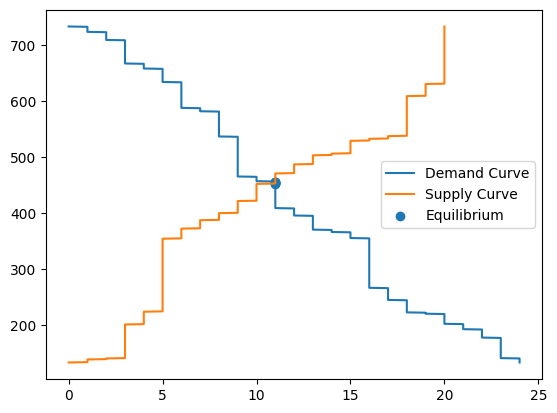


	Period: 0

		Step:0
		bids: [587.5, 581.7, 709.4, 723.5, 733.6, 657.9]
		asks: [138.2, 140.3, 132.7, 372.3]
		current bid: 4
		current ask: 2
		2 sells to 4 at 132.7!

		Step:1
		bids: [587.5, 581.7, 709.4, 723.5, 456.6, 657.9]
		asks: [138.2, 140.3, 452.4, 372.3]
		current bid: 3
		current ask: 0
		0 sells to 3 at 723.5!

		Step:2
		bids: [587.5, 581.7, 709.4, 408.2, 456.6, 657.9]
		asks: [387.4, 140.3, 452.4, 372.3]
		current bid: 2
		current ask: 1
		1 sells to 2 at 140.3!

		Step:3
		bids: [587.5, 581.7, 667.4, 408.2, 456.6, 657.9]
		asks: [387.4, 200.8, 452.4, 372.3]
		current bid: 2
		current ask: 1
		1 sells to 2 at 667.4!

		Step:4
		bids: [587.5, 581.7, 634.2, 408.2, 456.6, 657.9]
		asks: [387.4, 223.9, 452.4, 372.3]
		current bid: 5
		current ask: 1
		1 sells to 5 at 657.9!

		Step:5
		bids: [587.5, 581.7, 634.2, 408.2, 456.6, 395.2]
		asks: [387.4, 354.5, 452.4, 372.3]
		current bid: 2
		current ask: 1
		1 sells to 2 at 354.5!

		Step:6
		bids: [587.5, 581.7, 465.3, 408.2,

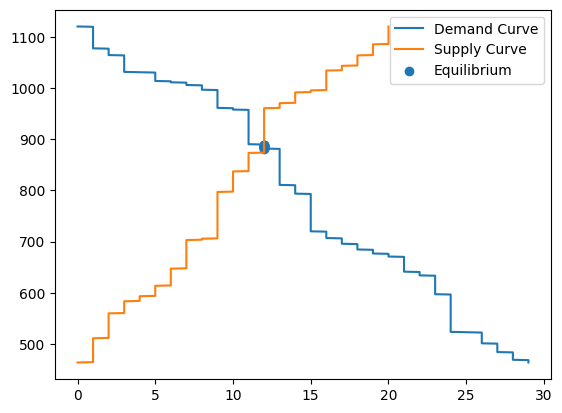


	Period: 0

		Step:0
		bids: [706.9, 1120.5, 1013.4, 1064.2, 1030.6, 1077.6]
		asks: [511.5, 463.7, 559.7, 584.0]
		current bid: 1
		current ask: 1
		1 sells to 1 at 463.7!

		Step:1
		bids: [706.9, 960.9, 1013.4, 1064.2, 1030.6, 1077.6]
		asks: [511.5, 593.7, 559.7, 584.0]
		current bid: 5
		current ask: 0
		0 sells to 5 at 511.5!

		Step:2
		bids: [706.9, 960.9, 1013.4, 1064.2, 1030.6, 957.9]
		asks: [797.2, 593.7, 559.7, 584.0]
		current bid: 3
		current ask: 2
		2 sells to 3 at 1064.2!

		Step:3
		bids: [706.9, 960.9, 1013.4, 1031.7, 1030.6, 957.9]
		asks: [797.2, 593.7, 703.3, 584.0]
		current bid: 3
		current ask: 3
		3 sells to 3 at 584.0!

		Step:4
		bids: [706.9, 960.9, 1013.4, 633.7, 1030.6, 957.9]
		asks: [797.2, 593.7, 703.3, 614.2]
		current bid: 4
		current ask: 1
		1 sells to 4 at 1030.6!

		Step:5
		bids: [706.9, 960.9, 1013.4, 633.7, 996.7, 957.9]
		asks: [797.2, 647.4, 703.3, 614.2]
		current bid: 2
		current ask: 3
		3 sells to 2 at 614.2!

		Step:6
		bids: [706.9, 

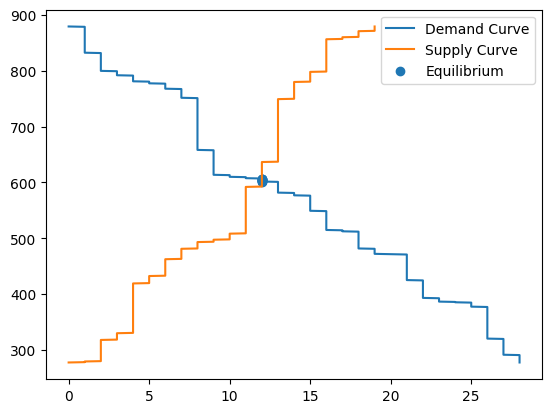


	Period: 0

		Step:0
		bids: [751.1, 791.4, 832.0, 879.1, 607.5, 799.4]
		asks: [277.8, 318.5, 279.9, 462.8]
		current bid: 3
		current ask: 0
		0 sells to 3 at 277.8!

		Step:1
		bids: [751.1, 791.4, 832.0, 776.9, 607.5, 799.4]
		asks: [508.8, 318.5, 279.9, 462.8]
		current bid: 2
		current ask: 2
		2 sells to 2 at 832.0!

		Step:2
		bids: [751.1, 791.4, 780.6, 776.9, 607.5, 799.4]
		asks: [508.8, 318.5, 330.2, 462.8]
		current bid: 5
		current ask: 1
		1 sells to 5 at 799.4!

		Step:3
		bids: [751.1, 791.4, 780.6, 776.9, 607.5, 609.8]
		asks: [508.8, 419.8, 330.2, 462.8]
		current bid: 1
		current ask: 2
		2 sells to 1 at 791.4!

		Step:4
		bids: [751.1, 548.9, 780.6, 776.9, 607.5, 609.8]
		asks: [508.8, 419.8, 497.6, 462.8]
		current bid: 2
		current ask: 1
		1 sells to 2 at 419.8!

		Step:5
		bids: [751.1, 548.9, 767.4, 776.9, 607.5, 609.8]
		asks: [508.8, 432.5, 497.6, 462.8]
		current bid: 3
		current ask: 1
		1 sells to 3 at 776.9!

		Step:6
		bids: [751.1, 548.9, 767.4, 657.7,

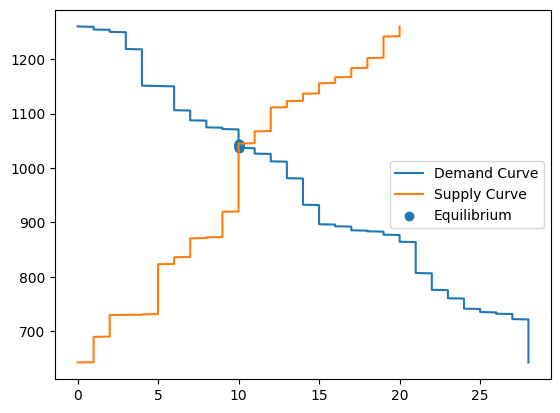


	Period: 0

		Step:0
		bids: [980.9, 1218.8, 1260.3, 1254.6, 1011.7, 1087.3]
		asks: [689.6, 731.0, 642.5, 729.8]
		current bid: 2
		current ask: 2
		2 sells to 2 at 1260.3!

		Step:1
		bids: [980.9, 1218.8, 1151.0, 1254.6, 1011.7, 1087.3]
		asks: [689.6, 731.0, 729.7, 729.8]
		current bid: 3
		current ask: 0
		0 sells to 3 at 1254.6!

		Step:2
		bids: [980.9, 1218.8, 1151.0, 1250.2, 1011.7, 1087.3]
		asks: [871.0, 731.0, 729.7, 729.8]
		current bid: 3
		current ask: 2
		2 sells to 3 at 729.7!

		Step:3
		bids: [980.9, 1218.8, 1151.0, 1036.8, 1011.7, 1087.3]
		asks: [871.0, 731.0, 823.4, 729.8]
		current bid: 1
		current ask: 3
		3 sells to 1 at 729.8!

		Step:4
		bids: [980.9, 1106.1, 1151.0, 1036.8, 1011.7, 1087.3]
		asks: [871.0, 731.0, 823.4, 1123.1]
		current bid: 2
		current ask: 1
		1 sells to 2 at 1151.0!

		Step:5
		bids: [980.9, 1106.1, 1150.8, 1036.8, 1011.7, 1087.3]
		asks: [871.0, 836.3, 823.4, 1123.1]
		current bid: 2
		current ask: 2
		2 sells to 2 at 1150.8!

		Step:6


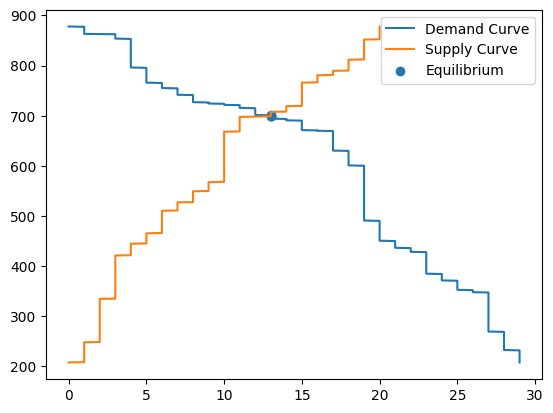


	Period: 0

		Step:0
		bids: [863.1, 863.1, 701.3, 853.9, 878.1, 795.6]
		asks: [527.6, 421.6, 208.0, 335.1]
		current bid: 4
		current ask: 2
		2 sells to 4 at 878.1!

		Step:1
		bids: [863.1, 863.1, 701.3, 853.9, 724.0, 795.6]
		asks: [527.6, 421.6, 248.5, 335.1]
		current bid: 0
		current ask: 2
		2 sells to 0 at 248.5!

		Step:2
		bids: [754.9, 863.1, 701.3, 853.9, 724.0, 795.6]
		asks: [527.6, 421.6, 465.9, 335.1]
		current bid: 1
		current ask: 3
		3 sells to 1 at 863.1!

		Step:3
		bids: [754.9, 765.6, 701.3, 853.9, 724.0, 795.6]
		asks: [527.6, 421.6, 465.9, 445.1]
		current bid: 3
		current ask: 1
		1 sells to 3 at 853.9!

		Step:4
		bids: [754.9, 765.6, 701.3, 671.4, 724.0, 795.6]
		asks: [527.6, 668.6, 465.9, 445.1]
		current bid: 5
		current ask: 3
		3 sells to 5 at 795.6!

		Step:5
		bids: [754.9, 765.6, 701.3, 671.4, 724.0, 669.6]
		asks: [527.6, 668.6, 465.9, 511.1]
		current bid: 1
		current ask: 2
		2 sells to 1 at 465.9!

		Step:6
		bids: [754.9, 690.9, 701.3, 671.4,

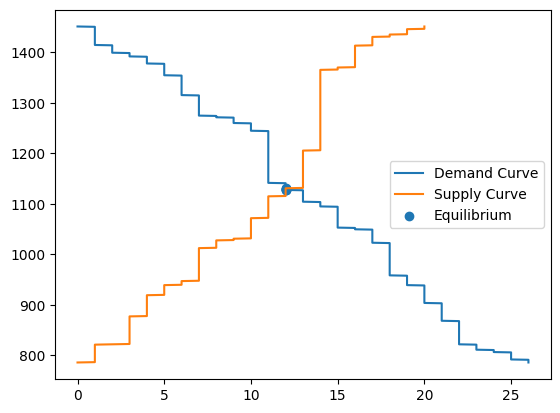


	Period: 0

		Step:0
		bids: [1413.9, 1377.3, 1450.9, 1314.6, 1398.6, 1127.0]
		asks: [785.6, 821.2, 918.9, 877.0]
		current bid: 2
		current ask: 0
		0 sells to 2 at 785.6!

		Step:1
		bids: [1413.9, 1377.3, 1354.1, 1314.6, 1398.6, 1127.0]
		asks: [821.7, 821.2, 918.9, 877.0]
		current bid: 0
		current ask: 1
		1 sells to 0 at 1413.9!

		Step:2
		bids: [1391.2, 1377.3, 1354.1, 1314.6, 1398.6, 1127.0]
		asks: [821.7, 1012.4, 918.9, 877.0]
		current bid: 4
		current ask: 0
		0 sells to 4 at 821.7!

		Step:3
		bids: [1391.2, 1377.3, 1354.1, 1314.6, 1274.1, 1127.0]
		asks: [938.9, 1012.4, 918.9, 877.0]
		current bid: 0
		current ask: 3
		3 sells to 0 at 877.0!

		Step:4
		bids: [1259.6, 1377.3, 1354.1, 1314.6, 1274.1, 1127.0]
		asks: [938.9, 1012.4, 918.9, 1071.5]
		current bid: 1
		current ask: 2
		2 sells to 1 at 918.9!

		Step:5
		bids: [1259.6, 1243.9, 1354.1, 1314.6, 1274.1, 1127.0]
		asks: [938.9, 1012.4, 947.1, 1071.5]
		current bid: 2
		current ask: 0
		0 sells to 2 at 1354.1!

	

In [275]:
size = 7
verbose = 1
nrounds, nperiods, ntokens, nbuyers, nsellers, R1, R2, R3, R4, minprice, maxprice, ntimes = game_setup(size,size,size,size,size,size)
print(f"Rounds:{nrounds}, Periods{nperiods}, Tokens:{ntokens}, Buyers:{nbuyers}, Sellers{nsellers}, R1-4:{R1, R2, R3, R4}")
step_data = []
period_data = []
round_data = []
buyer_strategies = ['Truthteller']*nbuyers
seller_strategies = ['Truthteller']*nsellers
for rnd in range(nrounds):
    if verbose == 1:
        print('\nRound:',rnd)
    token_values = round_setup(ntokens, nbuyers, nsellers, R1, R2, R3, R4)
    token_values = np.round(token_values,1)
    p_eqbm, q_eqbm = plot_demand_supply(token_values)
    buyers = [TruthTeller(token_values[i],buyer=True) for i in range(nbuyers)]
    sellers = [TruthTeller(token_values[i],buyer=False) for i in range(nbuyers,nbuyers+nsellers)] 
    for period in range(nperiods):
        prices = []
        if verbose == 1:
            print('\n\tPeriod:',period)
        for step in range(ntimes):
            if verbose == 1:
                print(f'\n\t\tStep:{step}')
            bids = [i.bid() for i in buyers]
            asks = [i.ask() for i in sellers]
            if verbose == 1:
                print('\t\tbids:',bids)
                print('\t\tasks:',asks)
            bids = np.array(bids)
            asks = np.array(asks)
            bids[bids == None] = np.nan
            asks[asks == None] = np.nan
            try:
                current_bid_idx = np.nanargmax(bids)
                current_ask_idx = np.nanargmin(asks)
            except:
                break
            current_bid = np.nanmax(bids)
            current_ask = np.nanmin(asks)
            if verbose == 1:
                print('\t\tcurrent bid:',current_bid_idx)
                print('\t\tcurrent ask:',current_ask_idx)
            buyer_acceptance = buyers[current_bid_idx].buy(current_bid,current_ask)
            seller_acceptance = sellers[current_ask_idx].sell(current_bid,current_ask)
            price = None
            if buyer_acceptance:
                if seller_acceptance:
                    price = np.random.choice([current_bid,current_ask])
                    buyers[current_bid_idx].transact(price)
                    sellers[current_ask_idx].transact(price)
                    if verbose == 1:
                        print(f'\t\t{current_ask_idx} sells to {current_bid_idx} at {price}!')
            prices.append(price)
            step_data.append([rnd,period,step,bids,asks,current_bid,current_bid_idx,current_ask,current_ask_idx,buyer_acceptance,seller_acceptance,price,p_eqbm, q_eqbm,nrounds, nperiods, ntokens, nbuyers, nsellers, R1, R2, R3, R4, minprice, maxprice, ntimes, buyer_strategies, seller_strategies])
        filtered_prices = [price for price in prices if price is not None]
        if verbose == 1:
            print(f'\n\tTotal Trades: {len(filtered_prices)}')
            print(f'\tPrices: {prices}')
        buyers_profits = [buyer.period_profit for buyer in buyers]
        sellers_profits = [seller.period_profit for seller in buyers]
        period_data.append([rnd,period,p_eqbm,q_eqbm,prices,token_values,buyers_profits,sellers_profits,buyer_strategies,seller_strategies])
    buyers_profits = [buyer.round_profit for buyer in buyers]
    sellers_profits = [seller.round_profit for seller in buyers]
    round_data.append([rnd,p_eqbm,q_eqbm,buyers_profits,sellers_profits,buyer_strategies,seller_strategies])

### Collect Data

In [276]:
import pandas as pd
step_column_names = [
    "rnd", "period", "step", "bids", "asks", "current_bid", "current_bid_idx",
    "current_ask", "current_ask_idx", "buyer_acceptance", "seller_acceptance",
    "price", "p_eqbm", "q_eqbm", "nrounds", "nperiods", "ntokens", "nbuyers",
    "nsellers", "R1", "R2", "R3", "R4", "minprice", "maxprice", "ntimes",
    "buyer_strategies", "seller_strategies"
]
period_column_names = [
    "rnd", "period", "p_eqbm", "q_eqbm", "prices", "token_values", "buyers_profits",
    "sellers_profits", "buyer_strategies", "seller_strategies"
]
round_column_names = [
    "rnd", "p_eqbm", "q_eqbm", "buyers_profits", "sellers_profits",
    "buyer_strategies", "seller_strategies"
]

#data.append([rnd,period,step,bids,asks,current_bid,current_bid_idx,current_ask,current_ask_idx,buyer_acceptance,seller_acceptance,price,nrounds, nperiods, ntokens, nbuyers, nsellers, R1, R2, R3, R4, minprice, maxprice, ntimes])
df_step = pd.DataFrame(step_data, columns = step_column_names)
df_period = pd.DataFrame(period_data, columns = period_column_names)
df_round = pd.DataFrame(round_data, columns = round_column_names)


In [277]:
df_round.head()

,rnd,p_eqbm,q_eqbm,buyers_profits,sellers_profits,buyer_strategies,seller_strategies
0,0,"[452.69879879879886, 453.30030030030036, 453.9...",11,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
1,1,"[881.842942942943, 882.5004004004004, 883.1578...",12,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
2,2,"[601.6232232232232, 602.225125125125, 602.8270...",12,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
3,3,"[1037.050950950951, 1037.6693693693694, 1038.2...",10,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
4,4,"[699.0042042042041, 699.6749749749749, 700.345...",13,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."


In [278]:
df_period.head()

,rnd,period,p_eqbm,q_eqbm,prices,token_values,buyers_profits,sellers_profits,buyer_strategies,seller_strategies
0,0,0,"[452.69879879879886, 453.30030030030036, 453.9...",11,"[132.7, 723.5, 140.3, 667.4, 657.9, 354.5, 587...","[[536.6, 88.5, 587.5, 50.6, 221.8], [201.7, 36...","[0.0, 0.0, 892.2, 0.0, 605.1000000000001, 0.0]","[0.0, 0.0, 892.2, 0.0, 605.1000000000001, 0.0]","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
1,1,0,"[881.842942942943, 882.5004004004004, 883.1578...",12,"[463.7, 511.5, 1064.2, 584.0, 1030.6, 614.2, 1...","[[695.6, 522.4, 706.9, 641.2, 676.1], [684.5, ...","[0, 656.8, 399.19999999999993, 447.70000000000...","[0, 656.8, 399.19999999999993, 447.70000000000...","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
2,2,0,"[601.6232232232232, 602.225125125125, 602.8270...",12,"[277.8, 832.0, 799.4, 791.4, 419.8, 776.9, 767...","[[751.1, 514.4, 254.9, 471.7, 581.7], [791.4, ...","[269.6, 0.0, 476.3, 601.3, 15.100000000000023,...","[269.6, 0.0, 476.3, 601.3, 15.100000000000023,...","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
3,3,0,"[1037.050950950951, 1037.6693693693694, 1038.2...",10,"[1260.3, 1254.6, 729.7, 729.8, 1151.0, 1150.8,...","[[760.1, 932.5, 604.9, 775.9, 980.9], [864.1, ...","[0, 758.8, 151.4999999999999, 520.5, 0, 216.29...","[0, 758.8, 151.4999999999999, 520.5, 0, 216.29...","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
4,4,0,"[699.0042042042041, 699.6749749749749, 700.345...",13,"[878.1, 248.5, 863.1, 853.9, 795.6, 465.9, 511...","[[754.9, 630.5, 741.7, 863.1, 727.0], [371.3, ...","[858.4, 299.70000000000005, 2.2999999999999545...","[858.4, 299.70000000000005, 2.2999999999999545...","[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."


In [279]:
df_step.head()

,rnd,period,step,bids,asks,current_bid,current_bid_idx,current_ask,current_ask_idx,buyer_acceptance,...,nsellers,R1,R2,R3,R4,minprice,maxprice,ntimes,buyer_strategies,seller_strategies
0,0,0,0,"[587.5, 581.7, 709.4, 723.5, 733.6, 657.9]","[138.2, 140.3, 132.7, 372.3]",733.6,4,132.7,2,True,...,4,728,26,2,728,1,2000,25,"[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
1,0,0,1,"[587.5, 581.7, 709.4, 723.5, 456.6, 657.9]","[138.2, 140.3, 452.4, 372.3]",723.5,3,138.2,0,True,...,4,728,26,2,728,1,2000,25,"[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
2,0,0,2,"[587.5, 581.7, 709.4, 408.2, 456.6, 657.9]","[387.4, 140.3, 452.4, 372.3]",709.4,2,140.3,1,True,...,4,728,26,2,728,1,2000,25,"[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
3,0,0,3,"[587.5, 581.7, 667.4, 408.2, 456.6, 657.9]","[387.4, 200.8, 452.4, 372.3]",667.4,2,200.8,1,True,...,4,728,26,2,728,1,2000,25,"[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."
4,0,0,4,"[587.5, 581.7, 634.2, 408.2, 456.6, 657.9]","[387.4, 223.9, 452.4, 372.3]",657.9,5,223.9,1,True,...,4,728,26,2,728,1,2000,25,"[Truthteller, Truthteller, Truthteller, Trutht...","[Truthteller, Truthteller, Truthteller, Trutht..."


In [281]:
df_step[]

28